# GitHub Developers to Developers Network Analysis

*Shamshad Ali/2019 (DS-038/2019 - NED/4063/2019-20), MS Data Science, NED University, Karachi.*

27 February, 2022.
##### CT-590 Data Visualization, submitted to Usama Ahsan.

**Background Summary**:

Development of the GitHub.com platform began on October 19, 2007. The site was launched in April 2008 by Tom Preston-Werner, Chris Wanstrath, P. J. Hyett and Scott Chacon. Today, it is a large network of developers. The dataset had been collected from the public API in year 2019. 

From the project link, the Nodes are developers who have starred at least 10 repositories and edges are mutual follower relationships between them. Hence developer (starred 10 repros.) to mutual follower developer relation is given in this dataset.
Developers are either a web or a machine learning developer (binary classification: 0 and 1). This target feature was derived from the job title of each user as mentioned in given link below:

Data Statistics:

- Undirected graph
- Node features: Yes.
- Edge features: No.
- Node labels: Yes. Binary-labeled.
- Nodes: 37,700
- Edges: 289,003
- Density: 0.001 **
- Transitvity: 0.013

Possible tasks:

- Binary node classification
- link prediction
- Community detection
- **Network visualization**

Source: https://snap.stanford.edu/data/github-social.html

In [1]:
import numpy as np
import pandas as pd
import networkx as nx #https://networkx.org/documentation/stable/
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF

### Dataset import and analysis ###

In [2]:
with open('musae_git_edges.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    ghds = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")

### Density of Graph ###
 https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html#:~:text=The%20density%20is%200%20for,have%20density%20higher%20than%201.


In [3]:
nx.density(ghds)

0.0004066878203117068

### Calculating betweeness 
#nx.betweenness_centrality(ghds)
The kernel was running for long and did not produce the results.

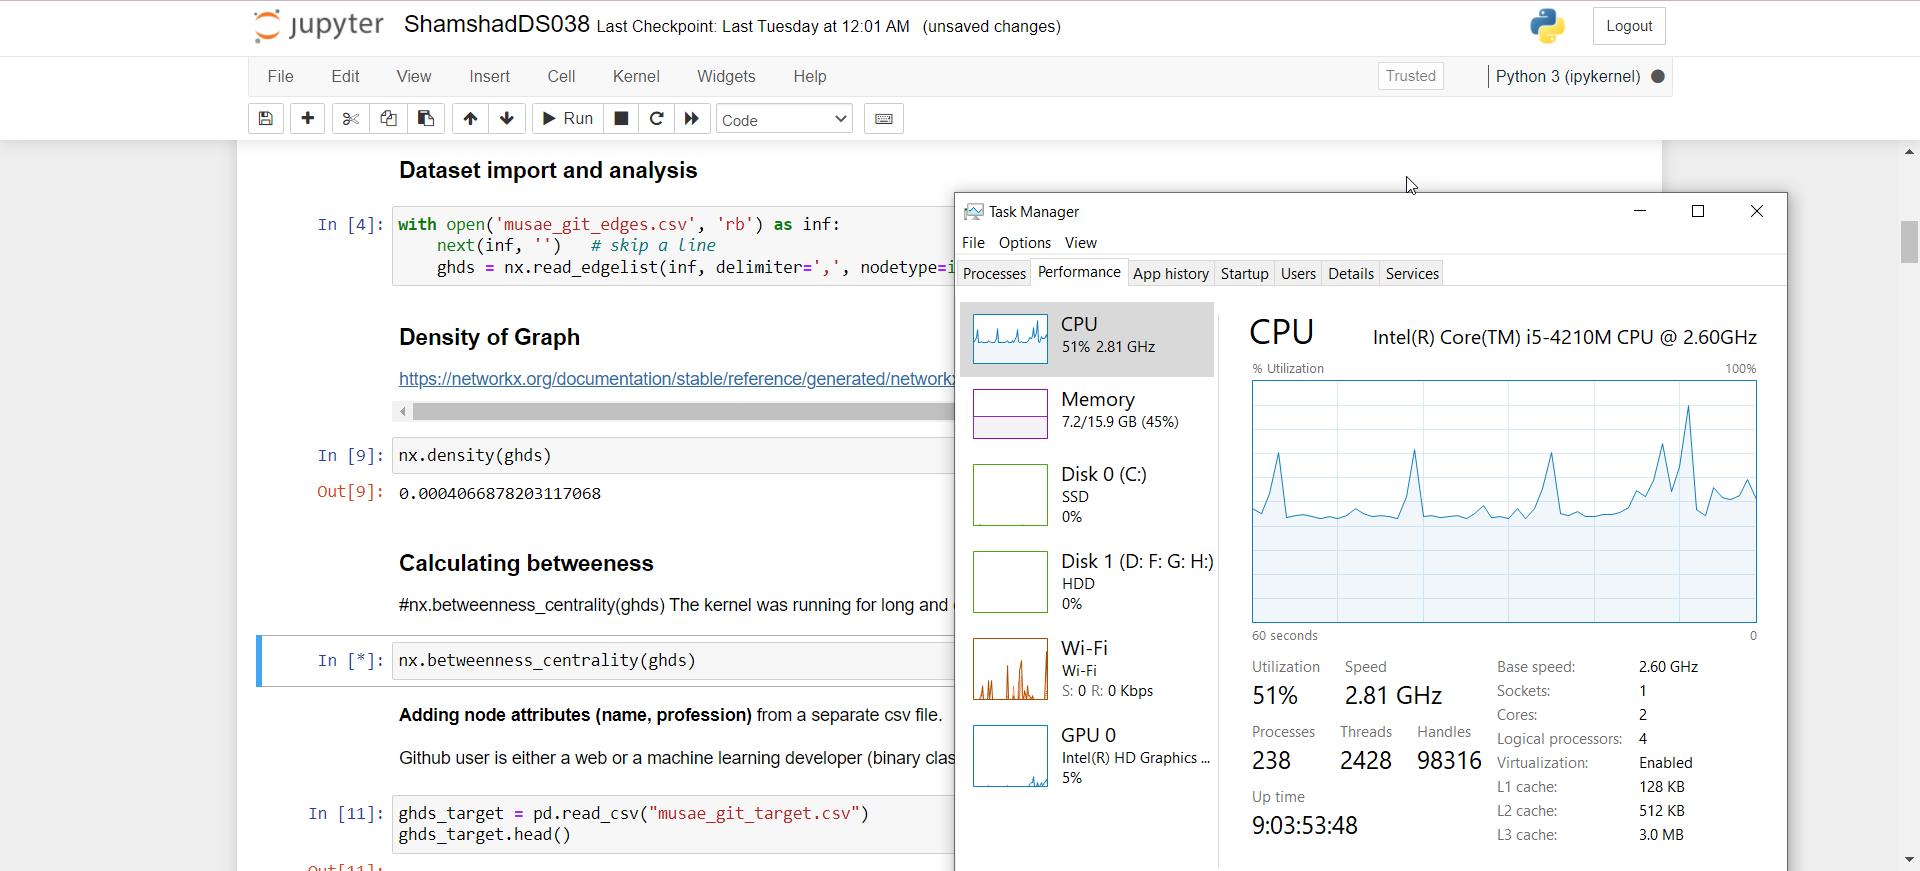

**Adding node attributes (name, profession)** from a separate csv file. 

Github user is either a web or a machine learning developer (binary classification: 0 and 1). This target feature was derived from the job title of each user.

In [4]:
ghds_target = pd.read_csv("musae_git_target.csv")
ghds_target.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


In [5]:
id = ghds_target["id"].to_list() 
name = ghds_target["name"].to_list()
prof = ghds_target["ml_target"].to_list()
d_name = dict(zip(id, name))
d_prof = dict(zip(id, prof))
nx.set_node_attributes(ghds, d_name, "name")
nx.set_node_attributes(ghds, d_prof, "prof")
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html

In [6]:
print('Total nodes: {}, Total edges: {}'.format(ghds.order(),ghds.size()))

Total nodes: 37700, Total edges: 289003


### Drawing the Network Graph
#nx.draw(ghds)

https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [7]:
nx.write_gexf(ghds, "ghds_developers.gexf")

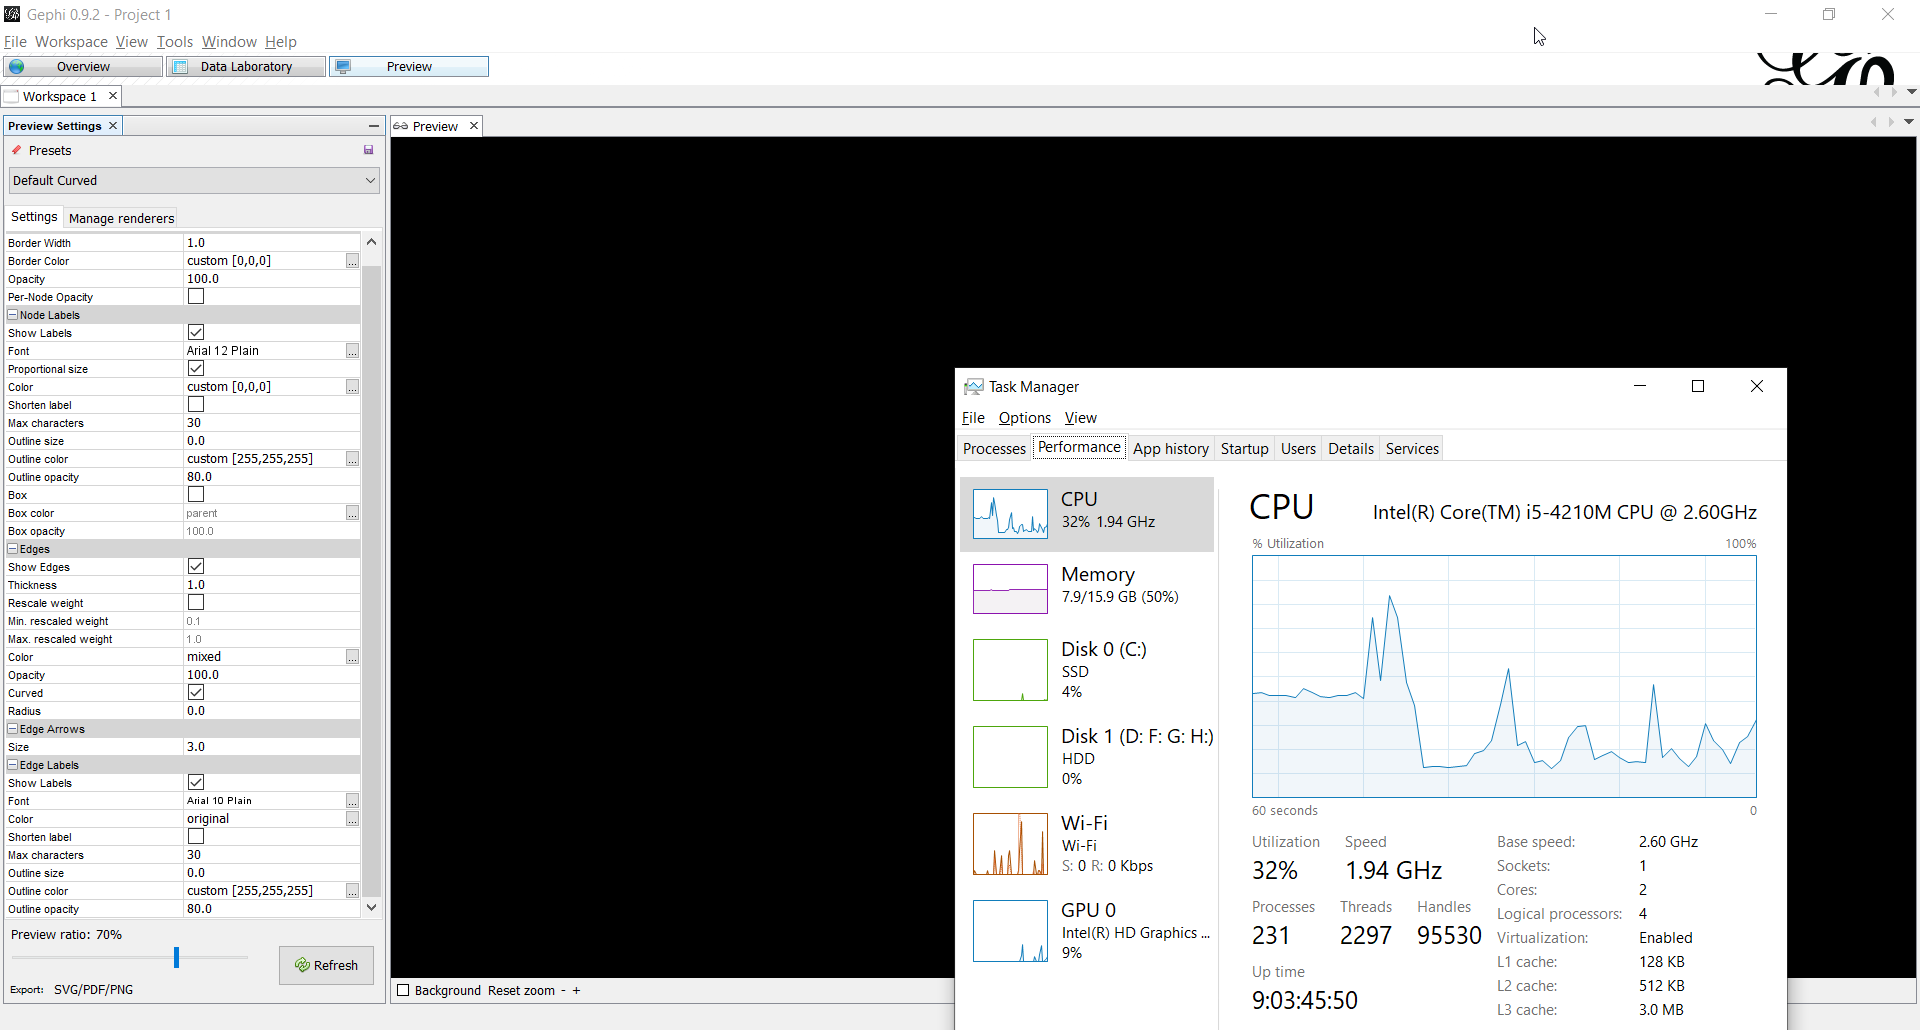

### Network Visualization
https://nocodefunctions.com/networkconverter/network_format_converter.html

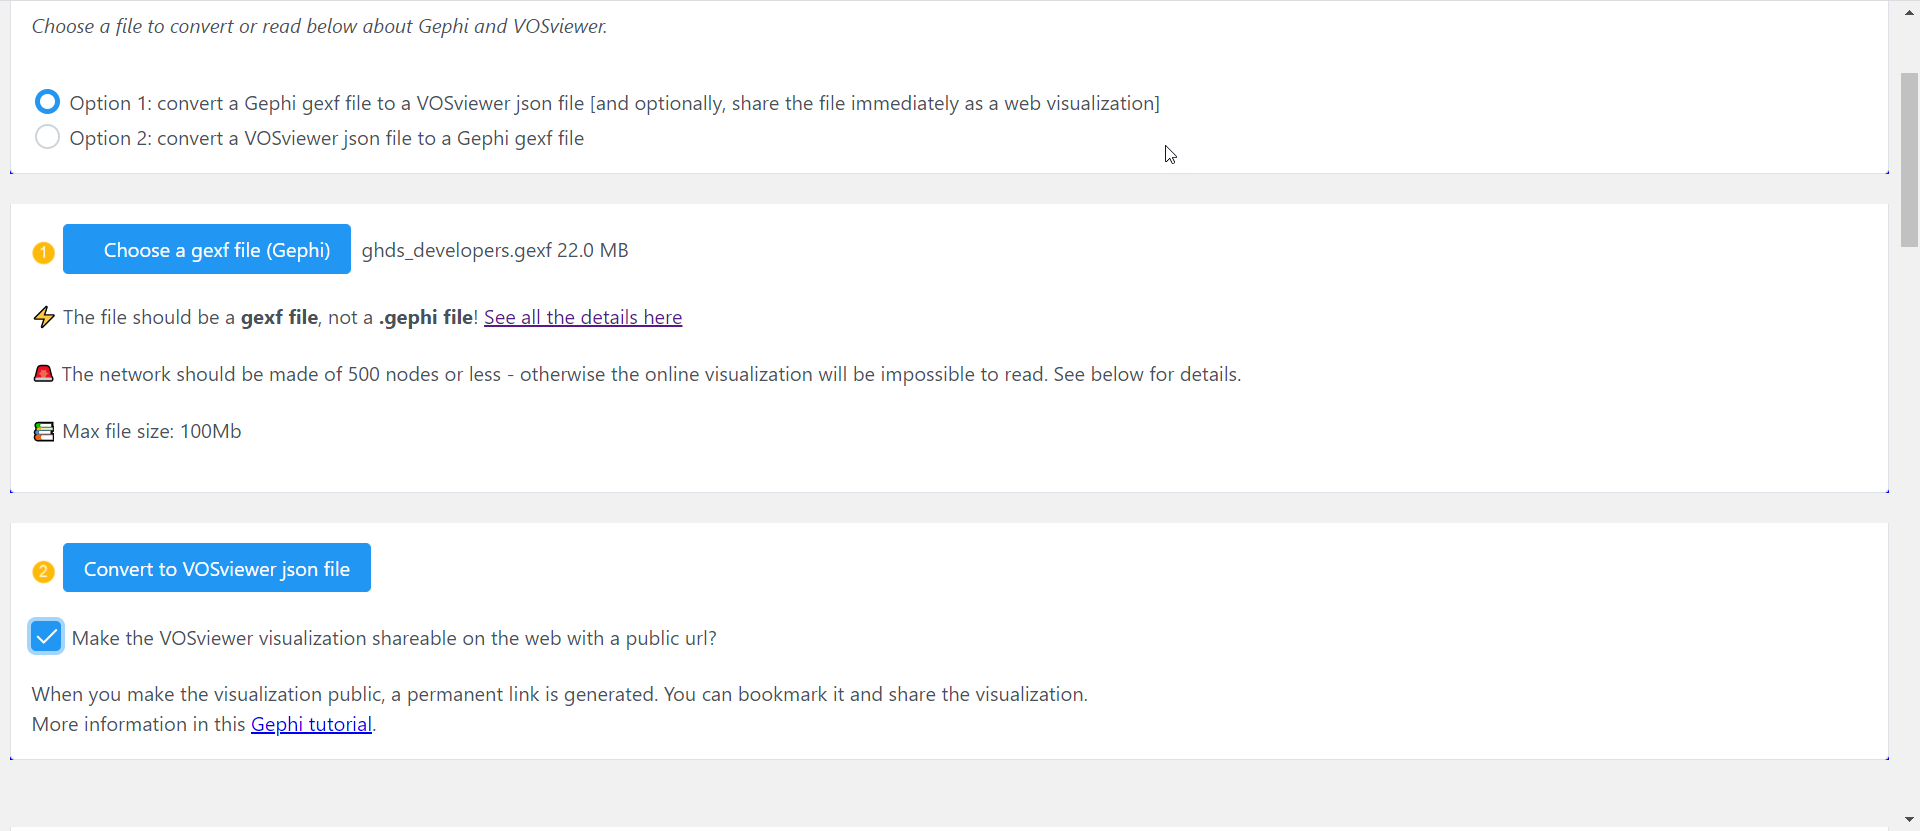

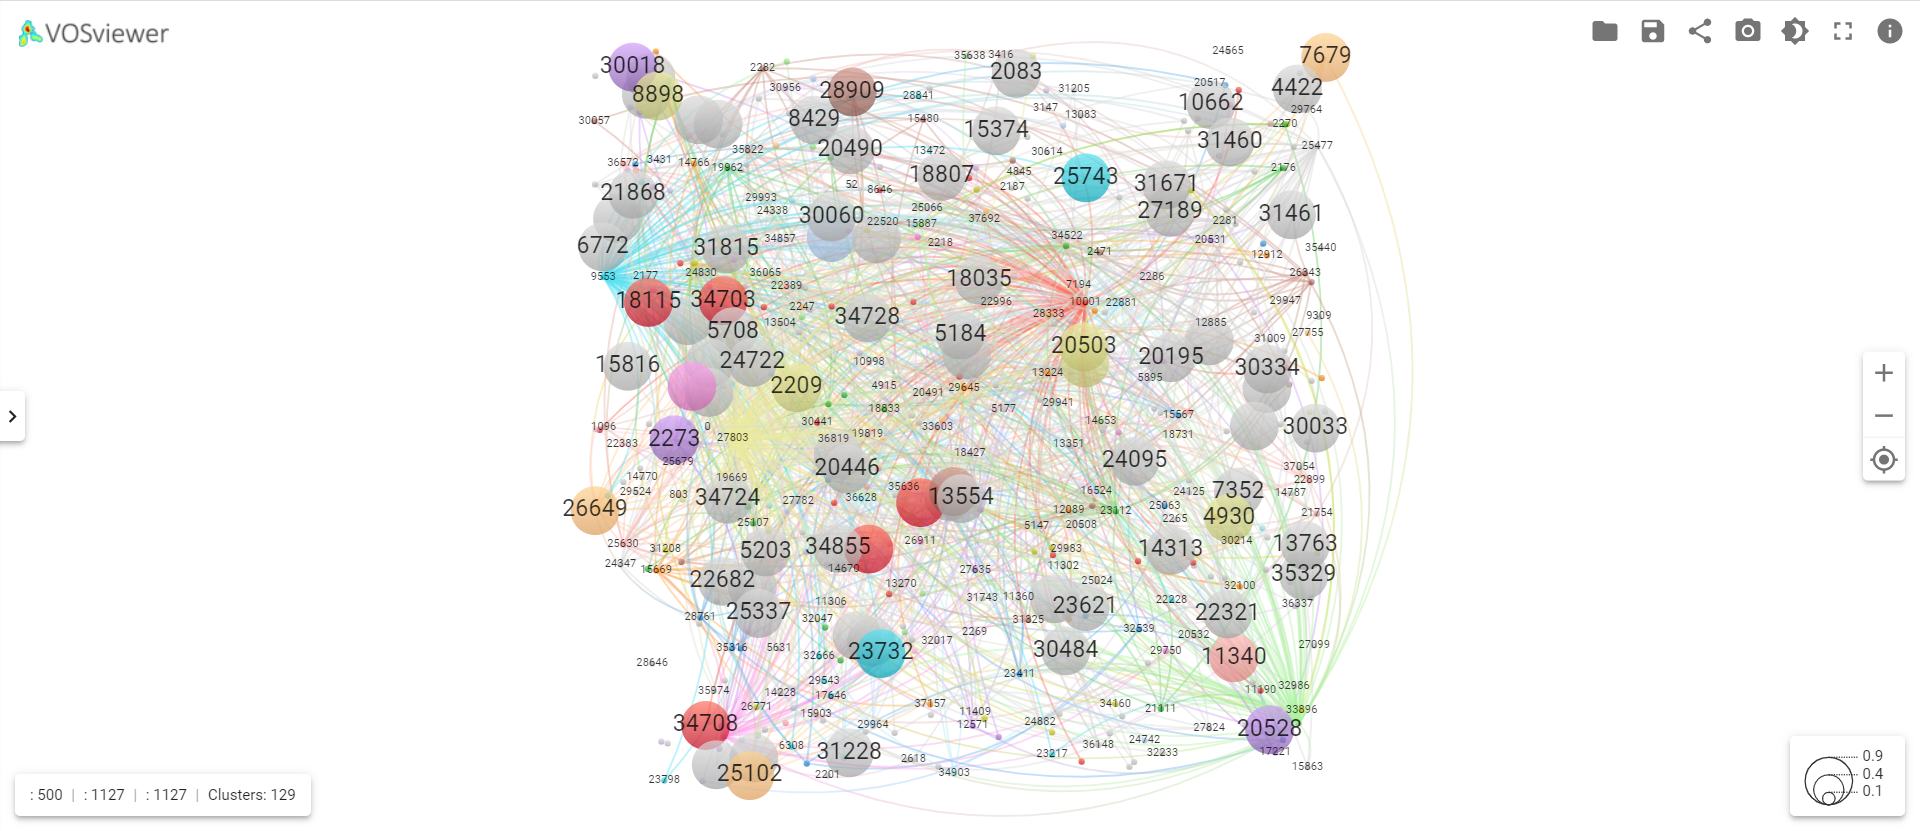

### Calculating Centrality & Analysis

Degree centrality, Eigenvector centrality and PageRank are computed as the most commonly used techniques of centrality.

Due to large dataset, Betweenness & Closeness centrality are excluded in analysis.
**Degree centrality** of the node is a fraction of nodes it is connected to.
**Eigenvector centrality** is a measure of the influence of a node in a network. 
**PageRank** is an adjustment of Katz centrality (eigenvector centrality) and determines the importance (ranking) of the nodes.

In [8]:
degree_cent = nx.degree_centrality(ghds)
eigenvect_cent = nx.eigenvector_centrality(ghds)
pr_cent = nx.pagerank(ghds)

In [9]:
#degree_cent

In [10]:
hub_degree = sorted(degree_cent.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvect = sorted(eigenvect_cent.items(),key = lambda x:x[1], reverse=True)[0]
hub_pr = sorted(pr_cent.items(),key = lambda x:x[1], reverse=True)[0]

print('degree:      ',hub_degree)
print('eigenvector: ',hub_eigenvect)
print('pagerank: ',hub_pr)

degree:       (31890, 0.25088198625958247)
eigenvector:  (31890, 0.35594895516626784)
pagerank:  (31890, 0.016513889880936803)


**Calculating graph density**

- https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

Graph density represents the ratio between the edges present in a graph and the maximum number of edges that the graph can contain. Conceptually, it provides an idea of how dense a graph is in terms of edge connectivity.
The density is 0 for a graph without edges and 1 for a complete graph. ... The density of multigraphs can be higher than 1. Self loops are counted in the total number of edges so graphs with self loops can have density higher than 1

In [11]:
gh_density = nx.density(ghds)
print("Graph Density: " + str(gh_density))

Graph Density: 0.0004066878203117068


**Result:** Here the graph density is very small which shows that a small fraction of existing links between Github users with respect to the possible links.

### Degree Analysis

In [12]:
gh_degree = list(dict(ghds.degree()).values())

In [13]:
print("Developers Degree Analysis: ")
print("Mean: " + str(np.mean(gh_degree)))
print("Median: " + str(np.median(gh_degree))) 
print("Std. : " + str(np.std(gh_degree)))
print("Max.: " + str(np.max(gh_degree)))
print("Min.: " + str(np.min(gh_degree)))

Developers Degree Analysis: 
Mean: 15.331724137931035
Median: 6.0
Std. : 80.78703073980464
Max.: 9458
Min.: 1


**Findings**

- Mean value is higher that median, so it is scale-free like network. To verify this we will check degree distribution and compare it to the random network degree distribution.
- Minimum degree is 1, so there as no isolated nodes.
**Scale Free Network:** https://en.wikipedia.org/wiki/Scale-free_network
One way to generate scale-free networks is using a preferential attachment algorithm. If you add new nodes to a network and preferentially attach them to the nodes with high degrees, the “rich get richer” and you end up with hubs of very high degree.


### Empirical Distribution Function

- https://machinelearningmastery.com/empirical-distribution-function-in-python/
However, while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data. To put this another way, the ECDF is the probability distribution you would get if you sampled from your sample, instead of the population.

Text(0, 0.5, 'EDF Linear Scale')

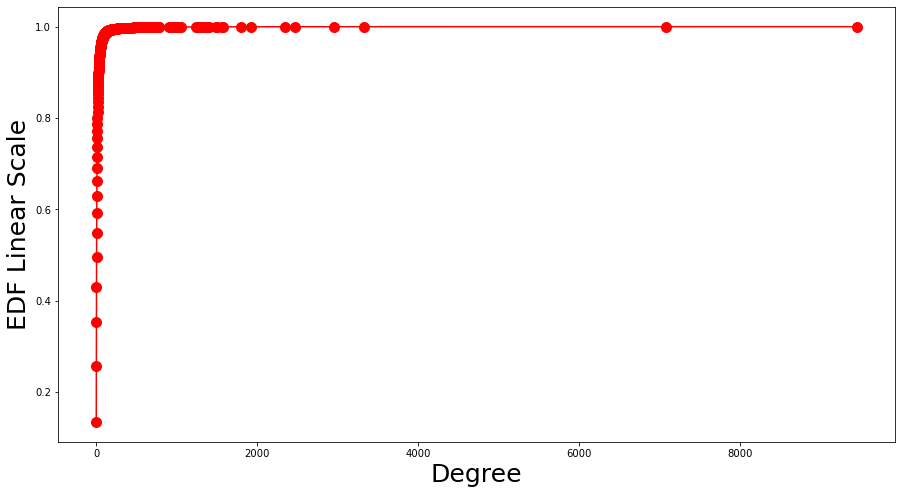

In [14]:
# EDF in linear scale
cdf_function = ECDF(gh_degree)
x = np.unique(gh_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(15,8)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'red', linestyle = '-', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 25)
axes.set_ylabel('EDF Linear Scale',size = 25)

**Log-log plots display data in two dimensions where both axes use logarithmic scales. When one variable changes as a constant power of another, a log-log graph shows the relationship as a straight line.**

Text(0, 0.5, 'EDF Log Log Scale')

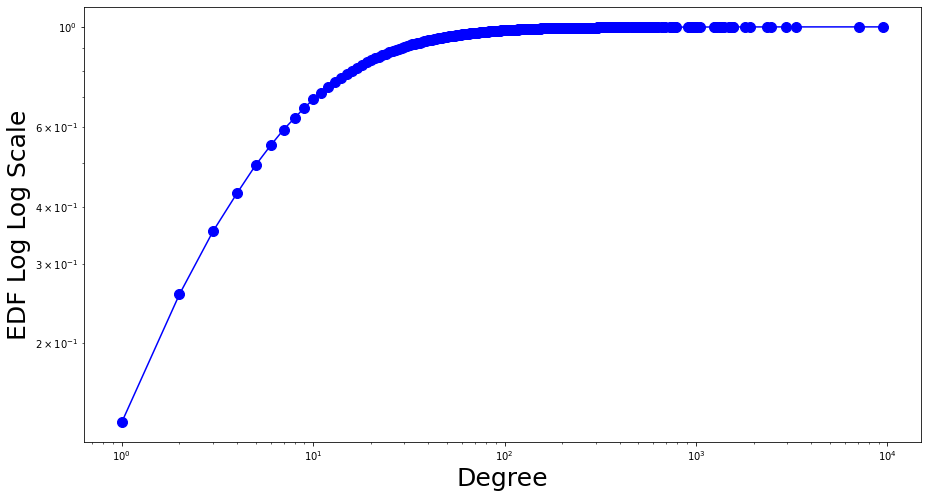

In [15]:
# EDF in loglog scale
fig_cdf_function = plt.figure(figsize=(15,8))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'blue', linestyle = '-', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 25)
axes.set_ylabel('EDF Log Log Scale',size = 25)

### Random Graph
A random graph is a graph in which properties such as the number of graph vertices, graph edges, and connections between them are determined in some random way. 

Random graphs are widely used in the probabilistic method, where one tries to prove the existence of graphs with certain properties. 

### Erdos-Renyi Random Graph
- https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html

Generating a random graph with the same number of nodes N and the probability of nodes to be randomly linked equal to the graph density.

In [16]:
p = gh_density
random_graph = nx.fast_gnp_random_graph(ghds.order(),p)
random_density = nx.density(random_graph)
print("Random Dataset Graph Density: " + str(random_density))
print("Natural Dataset Graph Density: " + str(gh_density))

Random Dataset Graph Density: 0.00040643030093953056
Natural Dataset Graph Density: 0.0004066878203117068


Here the graph density is almost same as of natural dataset we retrieverd earlier.

In [17]:
print('Random Graph nodes: {}'.format(random_graph.order()))
print('Random Graph edges: {}'.format(random_graph.size()))

Random Graph nodes: 37700
Random Graph edges: 288820


**Random graph degree statistics and distribution**

In [18]:
random_degree = list(dict(random_graph.degree()).values())

In [19]:
print("Random Degree Analysis: ")
print("Mean: " + str(np.mean(random_degree)))
print("Median: " + str(np.median(random_degree))) 
print("Std. : " + str(np.std(random_degree)))
print("Max.: " + str(np.max(random_degree)))
print("Min.: " + str(np.min(random_degree)))

Random Degree Analysis: 
Mean: 15.322015915119364
Median: 15.0
Std. : 3.9144455545768815
Max.: 33
Min.: 2


Text(0, 0.5, 'EDF Linear Scale')

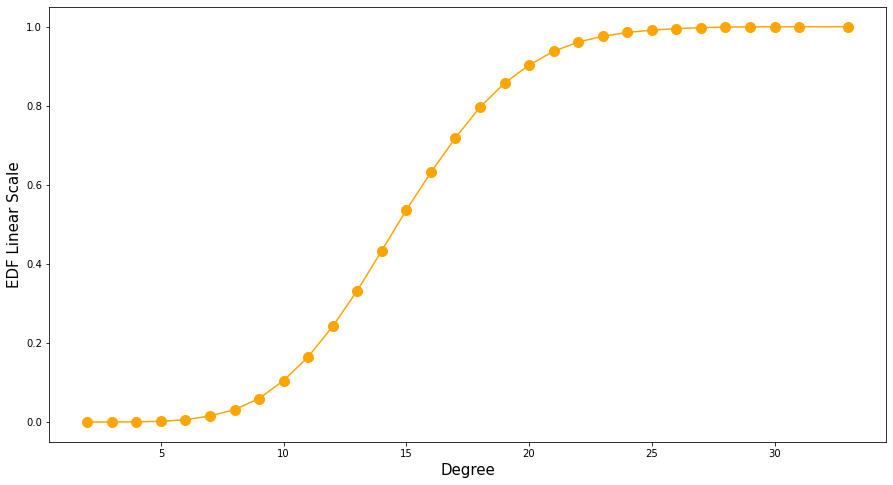

In [20]:
# EDF of Random Graph in linear scale
cdf_function = ECDF(random_degree)
x = np.unique(random_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(15,8)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'orange', linestyle = '-', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('EDF Linear Scale',size = 15)

Text(0, 0.5, 'EDF Log log scale')

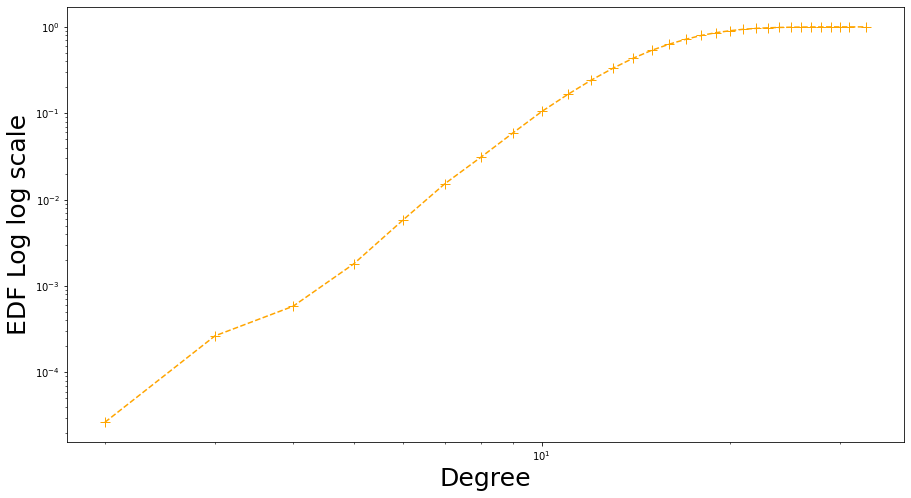

In [21]:
# EDF Random Graph in loglog scale
fig_cdf_function = plt.figure(figsize=(15,8))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= '+',ms = 10)
axes.set_xlabel('Degree',size = 25)
axes.set_ylabel('EDF Log log scale',size = 25)

Text(0, 0.5, 'EDF Random log log scale')

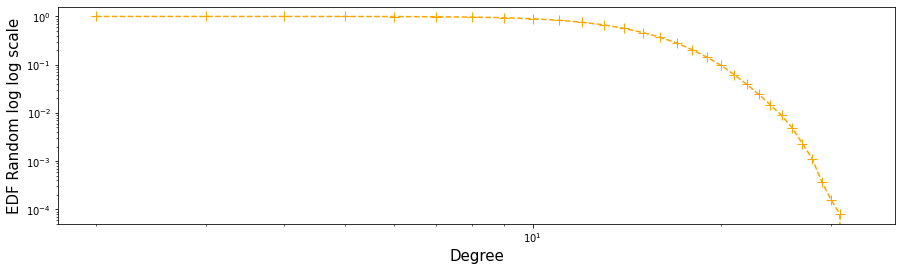

In [22]:
# EDF Random Graph in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(15,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'orange', linestyle = '--', marker= '+',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('EDF Random log log scale',size = 15)

### Comparing ECDF of Github natural and Erdos Renyi random graph
An ECDF is an estimator of the Cumulative Distribution Function. The ECDF essentially allows you to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set

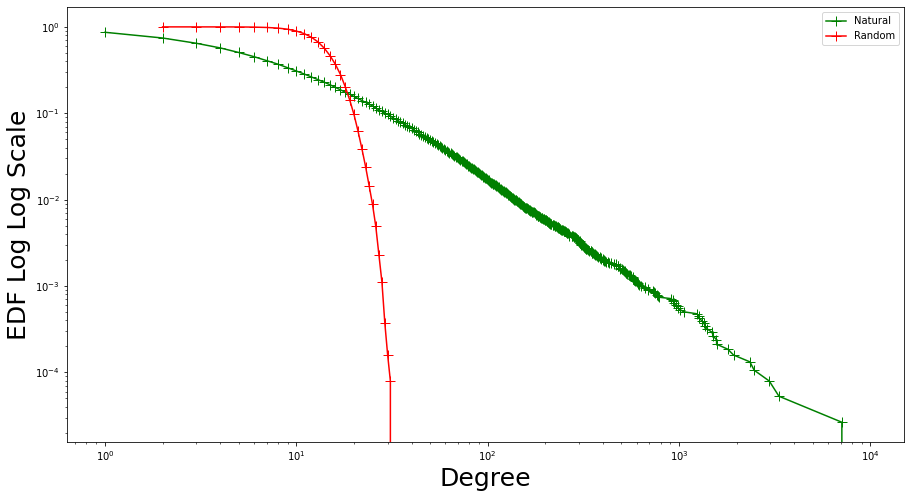

In [23]:
cdf = ECDF(gh_degree)
x = np.unique(gh_degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(15,8))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='+',ms=10, color='green', linestyle='-', label='Natural')
axes.loglog(x_random,1-y_random,marker='+',ms=10, color='red', linestyle='-' , label='Random')
axes.set_xlabel('Degree',size=25)
axes.set_ylabel('EDF Log Log Scale', size = 25)
axes.legend(loc='upper right', frameon=True)

**Natural vs Random graph comparison Result:**

Github graph degree distribution follows Power Law (Heavy Tail distribution) while random graph degree distribution is Poisson distribution. Heavy Tail indicates presence of hubs and the scale-free property of the network.

In random networks all nodes are alike, but in real networks there is a small number of vertices with a high degree level and most of the nodes have a low degree.

Networks with power-law distributions a called scale-free1 because power laws have the same functional form at all scales.

Networks whose degree distribution follows a Power Law are said to be scale-free networks. • The power law degree distribution can be defined in both discrete and continuous formalisms. – The scale-free property is independent of the formalism used to describe the degree distribution.

 ### Finding Hubs and isolated nodes


### Graph Connectivity Analysis

### Computing Transitivity

**Triangles**

Finds the number of triangles that include a node as one of the vertices.
When computing triangles for the entire graph each triangle is counted three times, once at each node.Self loops are ignored.
- https://networkx.org/documentation/networkx-1.2/reference/generated/networkx.triangles.html

**Transitivity**

Finds the fraction of all possible triangles which are in fact triangles. Possible triangles are identified by the number of “triads” (two edges with a shared vertex). In other words, Transitivity is a global custering coefficient, fraction of closed triangles to all possible triangles present in the network. Transitivity of the complete graph is 1.
- https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.transitivity.html

Refers to the extent to which the relation that relates two nodes in a network that are connected by an edge is transitive. Perfect transitivity implies that, if $x$ is connected (through an edge) to $y$, and $y$ is connected to $z$, then $x$ is connected to $z$ as well.

**Local clustering coefficient**

Compute the average clustering coefficient for the graph G. In other words, it shows the fraction of triangles that are actually exist over all possible triangles in a node's neighborhood
- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html